# Industrial Control Systems

Industrial control systems (ICS) are computers that control the world around you. They're responsible for managing the air conditioning in your office, the turbines at a power plant, the lighting at the theatre or the robots at a factory. In this notebook we will be doing a high-level analysis of the industrial control systems that are directly exposed to the Internet. Everything on this page can be done with a [free API key](https://account.shodan.io).

Keep in mind that Shodan only adds the ``ics`` tag to services that are running an industrial protocol (ex. Modbus). It doesn't include web servers, remote desktops or other services that may be used at an industrial facility but aren't an industrial protocol.

## Setting up the Environment

The following modules need to be installed:

* shodan
* pandas
* plotly
* kaleido (used so we can generate static images with plotly)

```bash
$ pip install shodan pandas plotly kaleido
```

Once you have everything installed we can start off by loading all necessary modules and setting up the Shodan API object:

In [1]:
from shodan import Shodan
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# If you don't have the Shodan CLI configured on your system then set
# your API key directly instead of calling "get_api_key()"
from shodan.cli.helpers import get_api_key
API_KEY = get_api_key()

api = Shodan(API_KEY)

## Facet Analysis in Shodan

In order to get the information out of the Shodan platform we will need to understand 2 concepts: search query and facets. The search query is used to tell Shodan what sort of services/ devices you want to analyze. And facets are used to get a distribution of values across the search results.

For the purpose of finding industrial control systems we will be taking advantage of the ``ics`` tag. And to get started we'll only care about results within the US. The resulting **search query** is:

```
tag:ics country:US
```

And we will be generating a breakdown of ICS devices by state which means we will be using the appropriately named ``state`` facet. For a list of available facets you can either look at our [API](https://developer.shodan.io/api) or browse them via the [facet analysis page](https://beta.shodan.io/search/facet).

In [2]:
ics_by_state = api.count('tag:ics country:US', facets=[('state', 50)])  # Get the top 50 values for the "state" facet
df = pd.DataFrame(ics_by_state['facets']['state'])
print('Total number of results: {}'.format(ics_by_state['total']))
print(df.head())

Total number of results: 34369
   count value
0   2019    CA
1   1670    NY
2   1425    TX
3    949    IL
4    931    PA


## Charting the Information

We will be taking advantage of the ``plotly`` library to create a choropleth chart out of the Pandas dataframe object. See the in-line comments in the code for a brief explanation of what's going on.

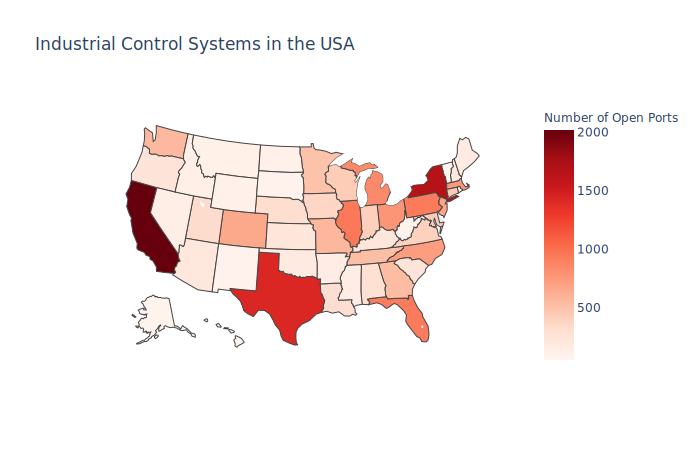

In [3]:
fig = go.Figure(data=go.Choropleth(
    locations=df['value'],  # Spatial coordinates
    z = df['count'],  # Data to be color-coded
    locationmode = 'USA-states',  # Set of locations match entries in `locations`
    colorscale = 'reds',
    colorbar_title = 'Number of Open Ports',
))

fig.update_layout(
    title_text = 'Industrial Control Systems in the USA',
    geo_scope='usa',  # Limit map scope to USA
)

fig.show('svg')

## Breakdown by Organization

Now that we understand the basics of grabbing data and displaying it lets see which organizations host most of these devices. To do that we will be running the same search query of ``tag:ics country:US`` but ask for the ``org`` facet (short for **organization**).

In [4]:
ics_by_org = api.count('tag:ics country:US', facets=[('org', 10)])  # Get the top 10 values for the "org" facet
df = pd.DataFrame(ics_by_org['facets']['org'])
print('Total number of results: {}'.format(ics_by_org['total']))
print(df.head())

Total number of results: 34369
   count                   value
0   7790        Verizon Wireless
1   4009        Comcast Business
2   2376       Spectrum Business
3   1567  AT&T Internet Services
4   1247            AT&T U-verse


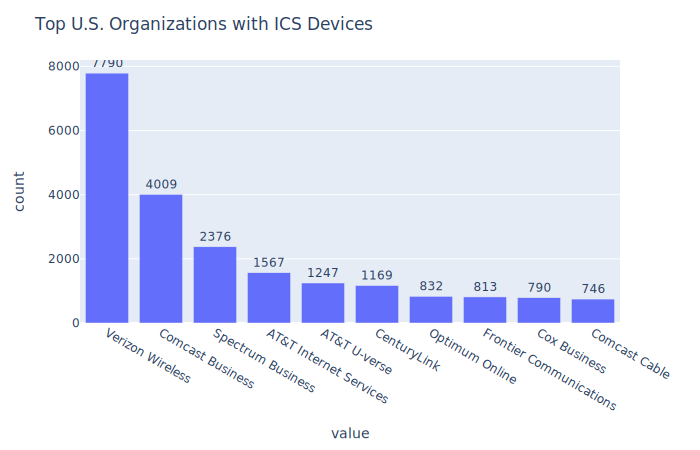

In [5]:
fig = px.bar(df, y='count', x='value', text='count')

fig.update_traces(textposition='outside')

fig.update_layout(
    title_text = 'Top U.S. Organizations with ICS Devices'
)
fig.show('svg')

## Conclusion

You've learned how to use facets to get a breakdown of values for a search query and chart them via ``plotly``. Hopefully this has given you an idea of what's possible using the Shodan platform. For further reading on Internet-connected industrial control systems here are a few articles:

* [Why Control Systems are on the Internet](https://blog.shodan.io/why-control-systems-are-on-the-internet/)
* [Taking Things Offline is Hard](https://blog.shodan.io/taking-things-offline-is-hard/)
* [Don't Be Clever](https://blog.shodan.io/dont-be-clever/)
* [State of Control Systems in the USA](https://blog.shodan.io/state-of-control-systems-in-the-usa-2015-05/)
* [Explore Industrial Control Systems](https://beta.shodan.io/explore/category/industrial-control-systems)